# Code for Report

In [1]:
import pandas as pd
import plotly.plotly as py
from geopy.geocoders import Nominatim
import geopy.distance as gdist
import numpy as np
import collections
import seaborn as sns
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

C:\Users\abhoo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
# uses adapted version of function accessed online to get rid of NAN values an replace with -
# https://quant.stackexchange.com/questions/31094/removing-nan-values-in-python-quantopian
# Written by stack exchange user: André Christoffer Andersen 
# all other numeric float values have commas stripped
def clean_data(df, cols):
    for i in cols:
        df[i] = df[i].apply(lambda x: 
                            np.nan if x=='-' else float(x.replace(',', '')))
    return df

## Building the socio-economic dataset

In [31]:
wealth = pd.read_csv('socioeconomic.csv')
wealth = wealth[wealth['State']== 'VIC']
wealth['Suburb'] = wealth['Suburb'].apply(lambda x: x.upper())
# uses regex to get rid of parenthesis and its contents from suburb names
wealth['Suburb'] = wealth['Suburb'].str.replace(r"\(.*\)","")
clean_data(wealth,['Usual Resident Population'])
wealth = wealth.ix[:, ['Suburb', 'Usual Resident Population', 'Score', 'State']]

C:\Users\abhoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [4]:
def filter_suburbs(df, filters):
    rem = []
    for val, row in df.iterrows():
        if (row['Suburb'] not in filters):
            rem.append(val)
    df.drop(rem, inplace = True)
    df.index = range(len(df.index))
    return df

In [5]:
def clean_up(df):
    #restricts dataset to contain only victorian data
    df = df[df['State']== 'VIC']
    #converts subrubs into uppercase
    df['Suburb'] = df['Suburb'].apply(lambda x: x.upper())
    #uses regex to get rid of parenthesis and its contents
    df['Suburb'] = df['Suburb'].str.replace(r"\(.*\)","")
    #gets rid of suburbs that are not in both datasets
    com_set = set(wealth['Suburb']).intersection(set(df['Suburb']))
    df = filter_suburbs(df, com_set)
    return df

In [26]:
resources = pd.read_csv('eco_resources.csv')
resources = clean_up(resources)
edu = pd.read_csv('education.csv')
edu = clean_up(edu)

C:\Users\abhoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\abhoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\abhoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Suburb  Education and Occupation State  Min Score
0         ABERFELDIE                    2480.0   VIC       1073
1            ACHERON                    2121.0   VIC       1061
2       ADAMS ESTATE                      93.0   VIC        896
3          ADDINGTON                    1288.0   VIC       1009
4      ADELAIDE LEAD                      60.0   VIC        882
5       AIREYS INLET                    2549.0   VIC       1076
6              AIRLY                    1293.0   VIC       1009
7       AIRPORT WEST                    1237.0   VIC        954
8          ALBANVALE                      39.0   VIC        802
9      ALBERTON WEST                    1124.0   VIC        999
10         ALFREDTON                    1502.0   VIC        943
11          ALLAMBEE                    2490.0   VIC       1104
12    ALLAMBEE SOUTH                    1763.0   VIC       1040
13       ALLANS FLAT                    1953.0   VIC       1040
14        ALLANSFORD                     468.0   VIC        866
15         ALLESTREE                     129.0   VIC        905
16           ALMURTA                    1448.0   VIC       1019
17        ALPHINGTON                    2622.0   VIC       1104
18    ALTONA MEADOWS                     466.0   VIC        896
19      ALTONA NORTH                     569.0   VIC        820
20             ALVIE                    1548.0   VIC       1026
21           AMHERST                      61.0   VIC        882
22      AMPHITHEATRE                     359.0   VIC        940
23            ANAKIE                    1189.0   VIC        947
24          ANDERSON                     222.0   VIC        924
25      ANGLERS REST                     817.0   VIC        981
26          ANGLESEA                    2327.0   VIC       1048
27          ANNUELLO                     849.0   VIC        983
28           ANTWERP                    1892.0   VIC       1047
29            ARARAT                     128.0   VIC        777
...              ...                       ...   ...        ...
1772         YANGERY                     582.0   VIC        961
1773       YANNATHAN                     727.0   VIC        974
1774          YAPEEN                     652.0   VIC        967
1775           YARCK                    1843.0   VIC       1045
1776      YARRA GLEN                    1222.0   VIC        962
1777  YARRA JUNCTION                     430.0   VIC        913
1778       YARRABERB                    1964.0   VIC       1052
1779        YARRAGON                     470.0   VIC        911
1780  YARRAGON SOUTH                    2491.0   VIC       1104
1781          YARRAM                     165.0   VIC        860
1782       YARRAMBAT                    1887.0   VIC        941
1783      YARRAVILLE                    2500.0   VIC       1009
1784      YARRAWALLA                    2301.0   VIC       1076
1785      YARROWEYAH                     433.0   VIC        908
1786             YEA                     686.0   VIC        925
1787       YELLINGBO                    1159.0   VIC        977
1788          YENDON                    1529.0   VIC       1025
1789             YEO                     956.0   VIC        990
1790         YEODENE                    2181.0   VIC       1065
1791          YERING                    1809.0   VIC       1043
1792  YEUNGROON EAST                    2160.0   VIC       1064
1793         YIELIMA                    1511.0   VIC       1023
1794          YINNAR                     505.0   VIC        940
1795    YINNAR SOUTH                     862.0   VIC        972
1796       YOUANMITE                    1200.0   VIC       1004
1797        YOUARANG                     824.0   VIC        981
1798        YULECART                    2080.0   VIC       1058
1799          YUROKE                    1399.0   VIC       1015
1800         YUULONG                    1103.0   VIC        998
1801         ZEERUST                    1656.0   VIC       1033

[1802 rows x 4 columns]

In [32]:
#integrates the minimum resources score and minimum education and income score
common_wealth = set(wealth['Suburb']).intersection(set(edu['Suburb']))
wealth = filter_suburbs(wealth, common)
edu = filter_suburbs(edu, common)
wealth.insert(loc = wealth.shape[1], column = 'min education and income score', value = edu['Min Score'])
wealth.insert(loc = wealth.shape[1], column = 'min resource score', value = resources['Min score'])

Suburb  Usual Resident Population  Score State  \
0         ABERFELDIE                     3897.0   1059   VIC   
1            ACHERON                      171.0   1017   VIC   
2       ADAMS ESTATE                       59.0    912   VIC   
3          ADDINGTON                       71.0   1008   VIC   
4      ADELAIDE LEAD                       81.0    895   VIC   
5       AIREYS INLET                      802.0   1041   VIC   
6              AIRLY                      146.0   1025   VIC   
7       AIRPORT WEST                     7564.0    971   VIC   
8          ALBANVALE                     5491.0    850   VIC   
9      ALBERTON WEST                       81.0    980   VIC   
10         ALFREDTON                     9220.0    903   VIC   
11          ALLAMBEE                       19.0   1074   VIC   
12    ALLAMBEE SOUTH                       76.0    997   VIC   
13       ALLANS FLAT                      318.0   1048   VIC   
14        ALLANSFORD                     1521.0    966   VIC   
15         ALLESTREE                      128.0    913   VIC   
16           ALMURTA                       48.0   1016   VIC   
17        ALPHINGTON                     5080.0   1097   VIC   
18    ALTONA MEADOWS                    19160.0    875   VIC   
19      ALTONA NORTH                    12152.0    748   VIC   
20             ALVIE                      132.0    963   VIC   
21           AMHERST                       65.0    895   VIC   
22      AMPHITHEATRE                      248.0    916   VIC   
23            ANAKIE                      690.0    967   VIC   
24          ANDERSON                       28.0    929   VIC   
25      ANGLERS REST                       21.0    947   VIC   
26          ANGLESEA                     2545.0   1008   VIC   
27          ANNUELLO                       25.0   1006   VIC   
28           ANTWERP                       63.0    975   VIC   
29            ARARAT                     8297.0    750   VIC   
...              ...                        ...    ...   ...   
1772         YANGERY                      111.0   1004   VIC   
1773       YANNATHAN                      238.0   1023   VIC   
1774          YAPEEN                      213.0    955   VIC   
1775           YARCK                      168.0   1003   VIC   
1776      YARRA GLEN                     2869.0    995   VIC   
1777  YARRA JUNCTION                     2549.0    919   VIC   
1778       YARRABERB                       23.0   1047   VIC   
1779        YARRAGON                     1650.0    917   VIC   
1780  YARRAGON SOUTH                      164.0   1074   VIC   
1781          YARRAM                     2135.0    802   VIC   
1782       YARRAMBAT                     1588.0   1050   VIC   
1783      YARRAVILLE                    14965.0   1032   VIC   
1784      YARRAWALLA                       90.0   1023   VIC   
1785      YARROWEYAH                      548.0    921   VIC   
1786             YEA                     1587.0    899   VIC   
1787       YELLINGBO                      534.0   1015   VIC   
1788          YENDON                      307.0    996   VIC   
1789             YEO                      148.0   1018   VIC   
1790         YEODENE                      121.0   1014   VIC   
1791          YERING                      115.0   1070   VIC   
1792  YEUNGROON EAST                       16.0   1038   VIC   
1793         YIELIMA                       87.0   1005   VIC   
1794          YINNAR                      907.0    941   VIC   
1795    YINNAR SOUTH                      691.0   1007   VIC   
1796       YOUANMITE                       59.0    989   VIC   
1797        YOUARANG                       39.0    988   VIC   
1798        YULECART                      127.0   1025   VIC   
1799          YUROKE                      142.0   1028   VIC   
1800         YUULONG                       37.0    957   VIC   
1801         ZEERUST                      149.0   1034   VIC   

      min education and income score  min res

## Building the crime dataset

In [33]:
crime = pd.read_csv('crime.csv', encoding  = 'ISO-8859-1')
suburbs = {}
discard = []
prev = ''
new_crime = pd.DataFrame({'Year': crime['Year ending September'],
                         'Suburb': crime['Suburb/Town Name'],
                         'Incidents': crime['Incidents Recorded']})
new_crime = new_crime[new_crime['Year'] == 2016]
new_crime = clean_data(new_crime, ['Incidents'])
new_crime = new_crime.groupby(['Year', 'Suburb']).sum()
new_crime.to_csv('newcrime1.csv', index = True)


C:\Users\abhoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



In [35]:
n_crime = pd.read_csv('newcrime1.csv')
common = set(wealth['Suburb']).intersection(set(n_crime['Suburb']))
#ensures both datasets only contain the same suburbs 
n_crime = filter_suburbs(n_crime, common)
wealth = filter_suburbs(wealth, common)

## Integrating datasets

In [42]:
integrated = pd.DataFrame({'Suburb': n_crime['Suburb'],
                       'Socio-economic Ranking': wealth['Score'],
                       'Crime Incidents': n_crime['Incidents'],
                    'Population': wealth['Usual Resident Population'],
                          'Minimum Resource Score': wealth['min resource score'],
                          'Minimum education and income score': wealth['min education and income score']})

Crime Incidents  Minimum Resource Score  \
0               117.0                    1015   
1                 1.0                    1035   
2                 1.0                     991   
3                 2.0                    1031   
4                 1.0                     979   
5                26.0                     993   
6                 1.0                    1084   
7               746.0                     936   
8               238.0                     915   
9                 2.0                    1023   
10              427.0                     874   
11                1.0                    1082   
12                2.0                    1044   
13                4.0                    1085   
14               22.0                    1032   
15                4.0                     966   
16                6.0                    1089   
17              306.0                    1003   
18              748.0                     888   
19              960.0                     700   
20                9.0                    1007   
21                3.0                     979   
22               10.0                     980   
23               19.0                    1035   
24                3.0                    1002   
25                8.0                     982   
26              129.0                     988   
27                2.0                    1015   
28                1.0                    1012   
29              791.0                     779   
...               ...                     ...   
1772              2.0                    1085   
1773              5.0                    1100   
1774              1.0                    1003   
1775              2.0                    1052   
1776             74.0                    1028   
1777             97.0                     918   
1778              1.0                    1074   
1779             94.0                     944   
1780              1.0                    1082   
1781            135.0                     820   
1782             77.0                    1117   
1783            747.0                     955   
1784              4.0                    1057   
1785             22.0                    1007   
1786            107.0                     925   
1787             36.0                    1080   
1788              5.0                    1017   
1789              4.0                    1100   
1790              2.0                    1037   
1791              8.0                    1099   
1792              1.0                    1071   
1793              5.0                    1052   
1794             32.0                     961   
1795             18.0                    1073   
1796              2.0                    1070   
1797              2.0                    1014   
1798              3.0                    1049   
1799              7.0                    1070   
1800              1.0                     994   
1801             28.0                    1082   

      Minimum education and income score  Population  Socio-economic Ranking  \
0                                   1073      3897.0                    1059   
1                                   1061       171.0                    1017   
2                                    896        59.0                     912   
3                                   1009        71.0                    1008   
4                                    882        81.0                     895   
5                                   1076       802.0                    1041   
6                                   1009       146.0                    1025   
7                                    954      7564.0                     971   
8                                    802      5491.0                     850   
9                                    999        81.0                     980   
10                                   943      9220.0                     903   
11     

## Finding longitude and latitude of suburbs

In [37]:
long_lat = {}
error_suburbs = []
rem = []
geolocator = Nominatim(timeout = None)
for y in integrated['suburb']:
    location = geolocator.geocode(y+ ' ' + "VIC")
    print (y)
    if location == None:
        error_suburbs.append(y)
        continue
    else:
        long_lat[y] = (location.longitude, location.latitude)
integrated = filter_suburbs(integrated, error_suburbs)

ABERFELDIE
ACHERON


KeyboardInterrupt: 

## Pearson Correlation and Mutual information

In [43]:
#using the code from Workshop ipynb: Example of Pearson Correlation and mutual information.ipynb
def entropy(T):
    H=0
    N=sum(T)
    for i in range(len(T)):
       if T[i]>0: H+=-T[i]/N*np.log2(T[i]/N)
    return H
def mutualInfo(x,y):
    x=(np.asarray(x)).astype(int)
    y=(np.asarray(y)).astype(int)
    assert(len(x)==len(y))
    
    nx=max(x)
    Tx=np.zeros(nx+1)
    for i in range(len(x)):
        Tx[x[i]]+=1.0
    Hx=entropy(Tx)

    ny=max(y)
    Ty=np.zeros(ny+1)
    for i in range(len(y)):
        Ty[y[i]]+=1.0
    Hy=entropy(Ty)
    
    T=np.zeros((nx+1,ny+1))
    for i in range(len(x)):
        T[x[i],y[i]]+=1.0
    Hxy=0
    for i in range(nx+1):
        for j in range(ny+1):
            if T[i,j]>0:  Hxy+=-T[i,j]/len(x)*np.log2(T[i,j]/len(x))
    
    Hxgy=Hxy-Hy
    Hygx=Hxy-Hx
    minH=min(Hx,Hy)
    
    return {'Hx':Hx,'Hy':Hy,'Hx|y': Hxgy , 'Hy|x': Hygx ,'MI':Hx+Hy-Hxy,'NMI':(Hx+Hy-Hxy)/minH} 

print("Pearson r is ",integrated['Crime Incidents'].corr(integrated['Socio-economic Ranking']))
result=mutualInfo(integrated.loc[:,'Socio-economic Ranking'],integrated.loc[:,'Crime Incidents'])
print("Entropies and mutual information are", result)

Pearson r is  -0.3634123455125337
Entropies and mutual information are {'Hx': 7.819380697805694, 'Hy': 6.1444944146766804, 'Hx|y': 4.1480255876715315, 'Hy|x': 2.473139304542518, 'MI': 3.6713551101341615, 'NMI': 0.5975032056933436}


## K-NN algorithm

In [45]:
#creates a dataframe column called high crime where crime incidents above the 75th percentile
#range of data are considered high (represented by 1) and other lows (0)
high_crime = []
for val, row in integrated.iterrows():
    if row['Crime Incidents'] >= 150:#np.percentile(n['crime'], 75):
        high_crime.append(1)
    else:
        high_crime.append(0)
integrated.insert(loc = integrated.shape[1], column = 'high_crime', value = high_crime)

In [46]:
#calculate accuracy score using K-NN algorithm from Workshop 8

##get just the features
data=integrated[[ 'Minimum education and income score', 'Minimum Resource Score', 'Population', 'Socio-economic Ranking']]


##get just the class labels
classlabel=integrated['high_crime']

##randomly select 66% of the instances to be training and the rest to be testing
# random state parameter ensures that everytime code is run, same split occurs
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) #each feature column between 0 and 1
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

(1189, 4)
(613, 4)
0.9608482871125612


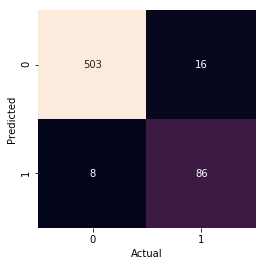

In [47]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',
           cbar = False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('falsepos.png')

## Outlier detection and analysis

In [ ]:
# outlier analysis done through adapting code from online
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
# written by Stack Overflow user: user2708149 
def noise_outlier(df_col):
    median_value = df_col.median()
    smaller_v = df_col[df_col < median_value]
    larger_v = df_col[df_col > median_value]
    iqr = larger_v.median() - smaller_v.median()
    noise_up = larger_v.median() + (iqr*1.5)
    noise_low = smaller_v.median() - (iqr*1.5)
    max_upp  =  larger_v.median() + (iqr*3)
    max_low = smaller_v.median() - (iqr*3)
    noise = sum(((s < noise_low) & (s > max_low))) + sum(((s > noise_up) & (s < max_up)))
    outliers = sum( s > max_up) + sum(s < max_low)
    return noise, outliers

In [ ]:
# creates boxplot to show outliers
# varied the attributes as required
n['crime'].plot.box()
plt.title('Crime Outliers')
plt.savefig('crime outliers.png')
plt.show()

## Scatter plot with Linear regression line


In [ ]:
# created scatterplot with linear regression using
# accessed from https://github.com/OpenGenus/quark/blob/master/code/code/artificial_intelligence/src/Linear_Regression/linear_regression.py
# Written by github user: AdiChat
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum((x - m_x) * (y - m_y))
    SS_xx = np.sum(x*x - m_x*m_x)

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

def plot_regression_line(xs, ys):
    # dev stands for deviation
    dev = estimate_coef(xs, ys)

    y_pred = []
    for x in xs:
        y_pred.append(dev[0] + dev[1] * x)

    # plotting the regression line
    plt.plot(xs, y_pred, color = "g")
new = integrated[integrated['crime']<400]
xarr = new['crime']
yarr = new['socio-economic status']

# Setting points as numpy arrays.
# It is more convenient this way for further process.
x = np.array(xarr)
y = np.array(yarr)

# Plotting points.
plt.scatter(x, y)

plot_regression_line(x, y)
plt.xlabel('Number of Crime Incidents')
plt.ylabel('Socio-economic ranking')
plt.tight_layout()
plt.savefig('scatter_regression_sm.png', dpi = 1080)
plt.show()

## Parallel Coordinates

In [ ]:
#plots the parallel coordinates of the suburbs
# can set the legend also to suburbs but too many suburbs so hard to read
# normalises the data
integrated['Crime Incidents'] = (integrated['Crime Incidents'] -integrated['Crime Incidents'].min())/(integrated['Crime Incidents'].max()-integrated['Crime Incidents'].min())
integrated['Socio-economic Ranking'] = (integrated['Socio-economic Ranking'] -integrated['Socio-economic Ranking'].min())/(integrated['Socio-economic Ranking'].max()-integrated['Socio-economic Ranking'].min())
integrated['Population'] = (integrated['Population'] -integrated['Population'].min())/(integrated['Population'].max()-integrated['Population'].min())
integrated['Minimum Resource Score'] = (integrated['Minimum Resource Score'] -integrated['Minimum Resource Score'].min())/(integrated['Minimum Resource Score'].max()-integrated['Minimum Resource Score'].min())
integrated['Minimum education and income score'] = (integrated['Minimum education and income score'] -integrated['Minimum education and income score'].min())/(integrated['Minimum education and income score'].max()-integrated['Minimum education and income score'].min())#the average for every day of the week is computed

n['name'] = ''

#plot the data using parallel coordinates
parallel_coordinates(n[['Crime Incidents','Socio-economic Ranking','Population','Minimum Resource Score','Minimum education and income score', 'name']],'name')
plt.show()

## Creating a geographic heatmap

In [ ]:
#converts a multiple dimension shapefile to 2D and makes sure that format
# is consistent with existing dataset (uppercase suburbs with no parenthesis)
unwanted = ["NSW", "ACT", "NT", "QLD", "SA", "WA"]
sub = gpd.read_file("./SSC_2011_AUST.shp")
sub['SSC_NAME'] = sub['SSC_NAME'].apply(lambda x: x.upper())

for i in unwanted:
    sub = sub[sub['SSC_NAME'].str.contains(i) == False]

commons = set(integrated['Suburb']).intersection(set(sub['SSC_NAME']))
sub = filter_suburbs(sub, commons)

v = shapefile.geometry.apply(lambda x: True if x != None else False)
shapefile = shapefile[v]
shapefile.to_file(output_filename, driver = 'ESRI Shapefile')

In [ ]:
#adapted from https://github.com/jamalmoir/notebook_playground/blob/master/uk_2015_houseprice.ipynb
# Github user name: jamalmoir
# building a geographic heatmap of victoria

#builds the basemap, which is Victoria in this case
fig, ax = plt.subplots(figsize=(100,100))
m = Basemap(projection='merc',llcrnrlat=-39.3866,urcrnrlat=-33.9813,\
            llcrnrlon=139.1832,urcrnrlon=150.9715,resolution='h')
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

# reads shapefile and merges with integrated dataset
m.readshapefile('out', 'area')
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.area],
        'area': [area['SSC_NAME'] for area in m.area_info]
    })
df_poly = df_poly.merge(integrated, on = 'area', how='inner')

# plots the heatmap
cmap = plt.get_cmap('PuRd')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['crime'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['crime'])
plt.colorbar(mapper, shrink=0.4)
plt.title('Socio-economic ranking hotspots')
plt.savefig('crime_not_norm.png')
m

